In [69]:
import pandas as pd

In [70]:
import missingno as mg

In [71]:
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("Fish.csv")

In [73]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [74]:
df.value_counts()

Species    Weight  Length1  Length2  Length3  Height   Width 
Bream      242.0   23.2     25.4     30.0     11.5200  4.0200    1
Pike       500.0   42.0     45.0     48.0     6.9600   4.8960    1
           200.0   30.0     32.3     34.8     5.5680   3.3756    1
           300.0   31.7     34.0     37.8     5.7078   4.1580    1
                   32.7     35.0     38.8     5.9364   4.3844    1
                                                                ..
Perch      85.0    18.2     20.0     21.0     5.0820   2.7720    1
           100.0   16.2     18.0     19.2     5.2224   3.3216    1
           110.0   19.0     21.0     22.5     5.6925   3.5550    1
                   20.0     22.0     23.5     5.5225   3.9950    1
Whitefish  1000.0  37.3     40.0     43.5     12.3540  6.5250    1
Length: 159, dtype: int64

In [75]:
df.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

<AxesSubplot:>

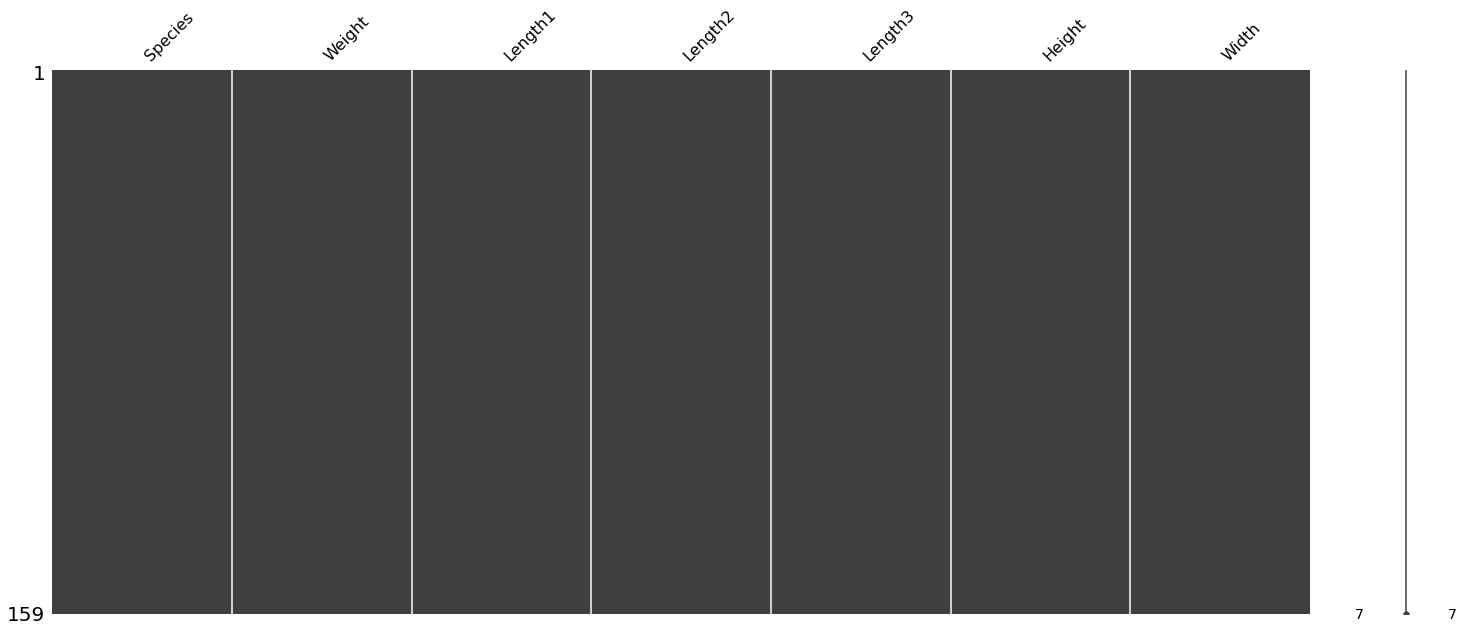

In [76]:
#Identify Missing Data

mg.matrix(df)

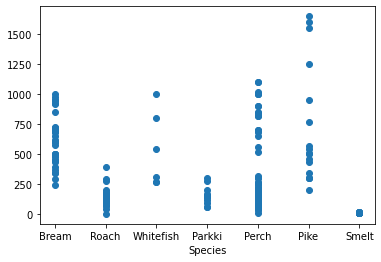

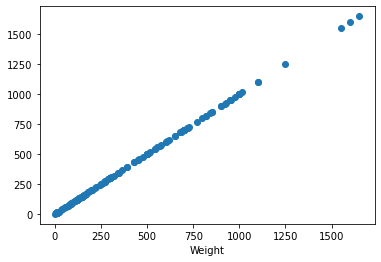

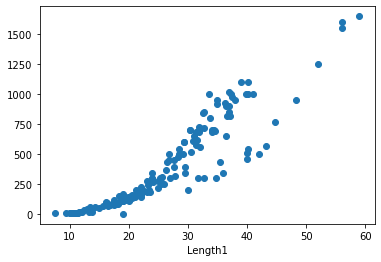

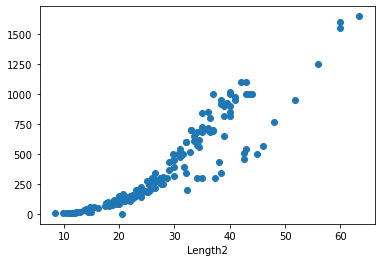

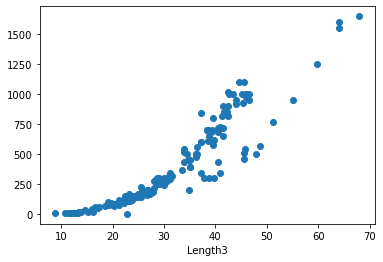

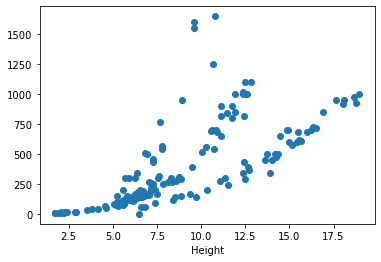

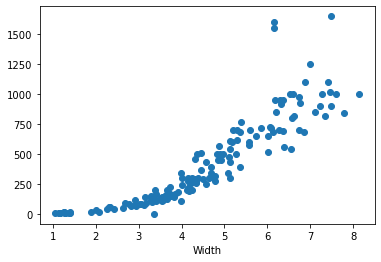

In [77]:
#Exploratory Data Analysis to check 
# Multiple Linear Regression Assumptions

df1 = df.iloc[:,:]
for a in df1.columns:
    plt.figure()
    plt.scatter(df1[a],df1['Weight'])
    plt.xlabel(a)

In [78]:
#Data Transformation
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [79]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [80]:
df.shape

(159, 7)

In [81]:
#Convert categorical variable using one hot encoder

species_dummies = pd.get_dummies(df['Species'])

In [82]:
df = pd.concat((df, species_dummies), axis = 1)

In [84]:
df.drop(columns = 'Species', inplace = True)

In [92]:
df.sum()

Weight       63333.9000
Length1       4173.3000
Length2       4518.1000
Length3       4965.1000
Height        1426.3880
Width          702.3802
Bream           35.0000
Parkki          11.0000
Perch           56.0000
Pike            17.0000
Roach           20.0000
Smelt           14.0000
Whitefish        6.0000
dtype: float64

In [93]:
from sklearn.model_selection import train_test_split

In [96]:
# Define X and Y variables

X = df.drop(columns = 'Weight', axis = 1)
y = df['Weight']

In [98]:
#Split data into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [ ]:
from sklearn import linear_model

In [108]:
mlr = linear_model.LinearRegression()

In [123]:
mlr.fit(X, y)

LinearRegression()

In [125]:
y_pred = mlr.predict(X)

In [126]:
from sklearn.metrics import r2_score

In [127]:
r2_score(y, y_pred)

0.9360849020585846